# Visa Approval Prediction


## 1. Problem Statement

#### Context
Business communities in the United States (US) are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the US look for hardworking, talented, and qualified individuals both locally as well as abroad.

The US Immigration and Nationality Act (INA) permits foreign workers to enter the country to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when hiring foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into US and grants certifications in those cases where employers can demonstrate that there are insufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

#### Objective
In FY2016, the OFLC processed 775,979 employer applications for 1,699,957 positions on temporary and permanent labor certifications. This was a 9% increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates with higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:
* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

Successful implementation of this solution promises to yield significant improvements for OFLC, including reduced processing time, operating costs, and administrative workload.

An ideal model will demonstrate the following:
- **Accuracy:** Achieve an F1-score of at least 80% in predicting visa approval outcome during the proof-of-concept phase, reflecting robust predictive performance with an optimal balance between precision and recall.
- **Efficiency:** Automate and streamline the visa certification process, reducing manual review time and improving overall processing speed.
- **Scalability:** Handle fluctuating application volumes without requiring significant demand in human resources.
- **Transparency and Fairness:**
   - Provide data-driven insights into visa approval trends and patterns.
   - Potentially identify and mitigate biases in the visa approval process.
   - Ensure explainability of the model's predictions to promote transparency, trust, and accountability.

## 2. Data Collection
We will use the EasyVisa dataset from [Kaggle](https://www.kaggle.com/datasets/moro23/easyvisa-dataset). 
- This dataset comprises a comprehensive set of attributes related to foreign employees who applied for a United States visa. These attributes encompass:
    - **Demographic Information:** Continent of origin, employee's education level, prevailing wage, and unit of wage.
    - **Employment History:** Prior work experience, requirement for job training, and whether the position is full-time.
    - **Employer Background:** Number of employees, year of establishment, and region of employment.
- The dataset also includes the final disposition of each application, categorized as `case_status`.

Here's a wget-able [link](https://raw.githubusercontent.com/wanyingng/visa-approval-prediction/refs/heads/main/notebook/data/EasyVisa.csv) to download the dataset:

```bash
wget https://raw.githubusercontent.com/wanyingng/visa-approval-prediction/refs/heads/main/notebook/data/EasyVisa.csv
```

In [1]:
# !wget https://raw.githubusercontent.com/wanyingng/visa-approval-prediction/refs/heads/main/notebook/data/EasyVisa.csv

### Import the necessary packages

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Print last updated
import datetime
print(f"Notebook last updated on: {datetime.datetime.now()}\n")

# Print versions of Python and the libraries we're using
import matplotlib
import sklearn
!python --version
print(f"\npandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")

Notebook last updated on: 2025-03-07 23:42:25.708401

Python 3.11.3

pandas version: 2.2.3
matplotlib version: 3.10.0
scikit-learn version: 1.6.1


### Import the CSV data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/EasyVisa.csv')

### Show the first 5 records of the dataset

In [5]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Shape of the dataset

In [6]:
df.shape

(25480, 12)

The dataset consists of 25,480 records and 12 columns.

## 3. Data Exploration

The goal of data exploration is to build an in-depth understanding of the dataset, identify potential issues, and extract key insights before proceeding with modeling.

To achieve this, we will perform the following steps:

**Step 1: Assess Missing Values**
- Identify missing values in each column.
- Quantify the percentage of missing values to assess the extent of the issue.
- Determine appropriate handling strategies, such as imputation or removal, based on data characteristics.

**Step 2: Detect and Handle Duplicates**
- Identify duplicate rows within the dataset.
- Assess whether duplicates result from data entry errors or valid repeated records.
- Remove or retain duplicates based on their relevance to the analysis.

**Step 3: Verify Data Types**
- Examine the data types of each column (`float`, `int`, `object`, `datetime`, `bool`).
- Ensure consistency by correcting misclassified data types (i.e., converting numerical values stored as strings to float).
- Check for mixed-type columns that may require standardization.

**Step 4: Analyze Unique Values**
- Count the number of unique values in each column to gauge data variability.
- Identify categorical variables incorrectly stored as numerical.
- Detect potential data quality issues, such as unexpected unique values or inconsistencies.

**Step 5: Summarize Numerical Columns**
- Compute key descriptive statistics, including mean, median, standard deviation, minimum, and maximum values.
- Assess data distribution and identify potential skewness.
- Detect outliers that may require treatment or transformation.

**Step 6: Examine Categorical Features**
- Identify unique categories within each categorical column.
- Compute frequency distributions to understand category prevalence and class imbalance.
- Detect rare or underrepresented categories that might affect model performance.

This methodical approach to data exploration improves data quality, identifies potential preprocessing needs, and offers a solid foundation for building robust and reliable machine learning models.

In [7]:
df.head().T

,0,1,2,3,4
case_id,EZYV01,EZYV02,EZYV03,EZYV04,EZYV05
continent,Asia,Asia,Asia,Asia,Africa
education_of_employee,High School,Master's,Bachelor's,Bachelor's,Master's
has_job_experience,N,Y,N,N,Y
requires_job_training,N,N,Y,N,N
no_of_employees,14513,2412,44444,98,1082
yr_of_estab,2007,2002,2008,1897,2005
region_of_employment,West,Northeast,West,West,South
prevailing_wage,592.2029,83425.65,122996.86,83434.03,149907.39
unit_of_wage,Hour,Year,Year,Year,Year


In [8]:
df.tail().T

,25475,25476,25477,25478,25479
case_id,EZYV25476,EZYV25477,EZYV25478,EZYV25479,EZYV25480
continent,Asia,Asia,Asia,Asia,Asia
education_of_employee,Bachelor's,High School,Master's,Master's,Bachelor's
has_job_experience,Y,Y,Y,Y,Y
requires_job_training,Y,N,N,Y,N
no_of_employees,2601,3274,1121,1918,3195
yr_of_estab,2008,2006,1910,1887,1960
region_of_employment,South,Northeast,South,West,Midwest
prevailing_wage,77092.57,279174.79,146298.85,86154.77,70876.91
unit_of_wage,Year,Year,Year,Year,Year


### Data Dictionary

The DataFrame contains the following columns:
- `case_id`: A unique identifier for each visa application.
- `continent`: The continent of the employee's origin (e.g., Africa, Asia, Europe, North America, Oceania, or South America).
- `education_of_employee`: The employee's highest level of education (e.g., High School, Bachelor's, Master's, or Doctorate).
- `has_job_experience`: Indicates whether the employee has prior work experience (Y/N).
- `requires_job_training`: Indicates whether the employee requires job training (Y/N).
- `no_of_employees`: The total number of employees in the employer's company.
- `yr_of_estab`: The year in which the employer's company was established.
- `region_of_employment`: The intended region of employment for the foreign worker within the United States (e.g., West, Northeast, South, Midwest, or Island).
- `prevailing_wage`: The average wage paid to similarly employed workers in the specific occupation and area of intended employment. This ensures that the foreign worker is not underpaid compared to other workers in the same role and location.
- `unit_of_wage`: The unit of measurement for the prevailing wage (e.g., Hour, Week, Month, or Year).
- `full_time_position`: Indicates whether the position is full-time (Y) or part-time (N).
- `case_status`: The final status of the visa application (Certified/Denied).


**Observation:** A significant portion of the variables in this dataset are categorical, representing characteristics such as employee origin, education level, and employment status. While some numerical features exist, such as `no_of_employees` and `prevailing_wage`, they are less prevalent.

### Check for missing values

In [9]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

A preliminary analysis suggests the absence of missing values in the dataset.

### Check for duplicates

In [10]:
df.duplicated().sum()

0

No duplicate rows were found in the dataset.

### Data type of each column

In [11]:
# Check for null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Data Composition:** The dataset comprises three numerical columns and nine categorical columns. 

**Memory Usage:** The DataFrame currently occupies approximately 2.3 MB of system memory. For most modern systems, this is considered a modest memory footprint and should not significantly impact system performance. However, it's crucial to monitor memory usage, especially when dealing with larger datasets or on systems with limited resources. Excessive memory consumption can lead to performance issues, such as slow processing speeds or even memory errors.

### Number of unique values for each column

In [12]:
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

### Summary statistics of numerical columns

In [13]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


By analyzing summary statistics, we can effectively determine the data's central tendency, dispersion, and distribution, and readily identify potential outliers.

**Observations:**
- `no_of_employees`:
  - High variability in employer size, indicated by a large standard deviation.
  - Presence of a potential outlier with a minimum value of -26 employees, suggesting potential data entry errors.
  - Significant proportion of employers with fewer than 3504 employees.
  - Right-skewed distribution, evident from the mean being greater than the median.

- `yr_of_estab`:
  - Wide range of establishment years, spanning from the 1800s to 2016.
  - Moderate variability in establishment years.
  - Left-skewed distribution, as indicated by the mean being lower than the median.

- `prevailing_wage`:
  - High variability in prevailing wages across positions.
  - Presence of a potential outlier with a wage of 2.14 , likely due to mistake or incorrect unit-of-wage information.
  - Possible near-symmetric distribution, suggested by the close proximity of the mean and median.

**Key Insights:**
- The dataset exhibits significant variability in key numerical variables (number of employees, establishment year, and prevailing wage).
- Potential outliers and data inconsistencies exist in `no_of_employees` and `prevailing_wage`, requiring further investigation and cleaning.
- The distributions of these variables show varying degrees of skewness, with `no_of_employees` being right-skewed and `yr_of_estab` being left-skewed.

In [14]:
# Define the numerical & categorical columns
numerical = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical = [feature for feature in df.columns if df[feature].dtype == 'O']

In [15]:
numerical

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

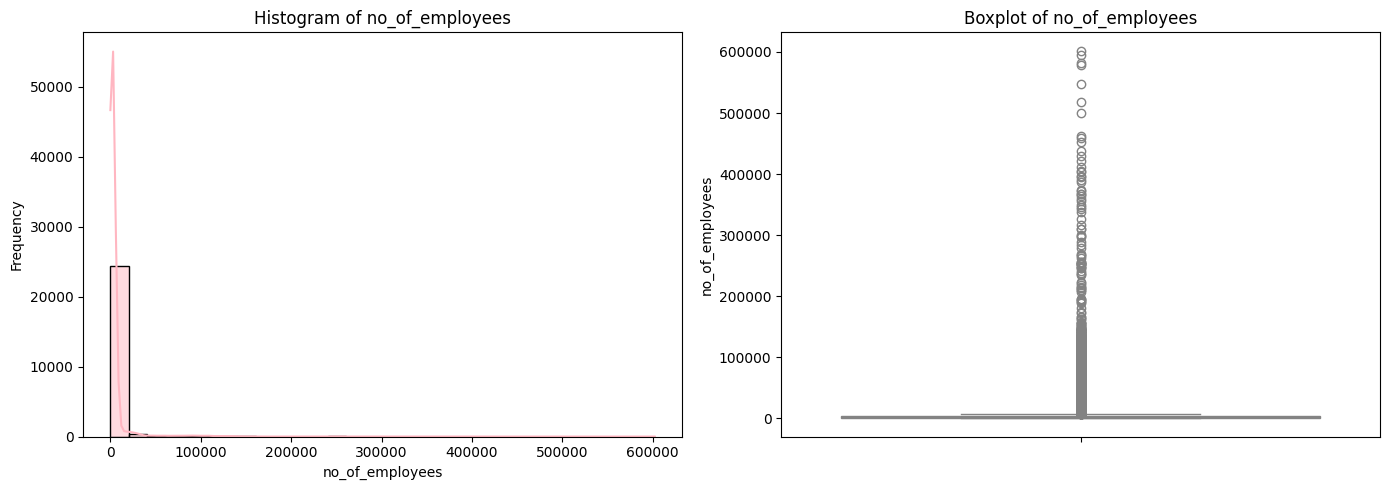

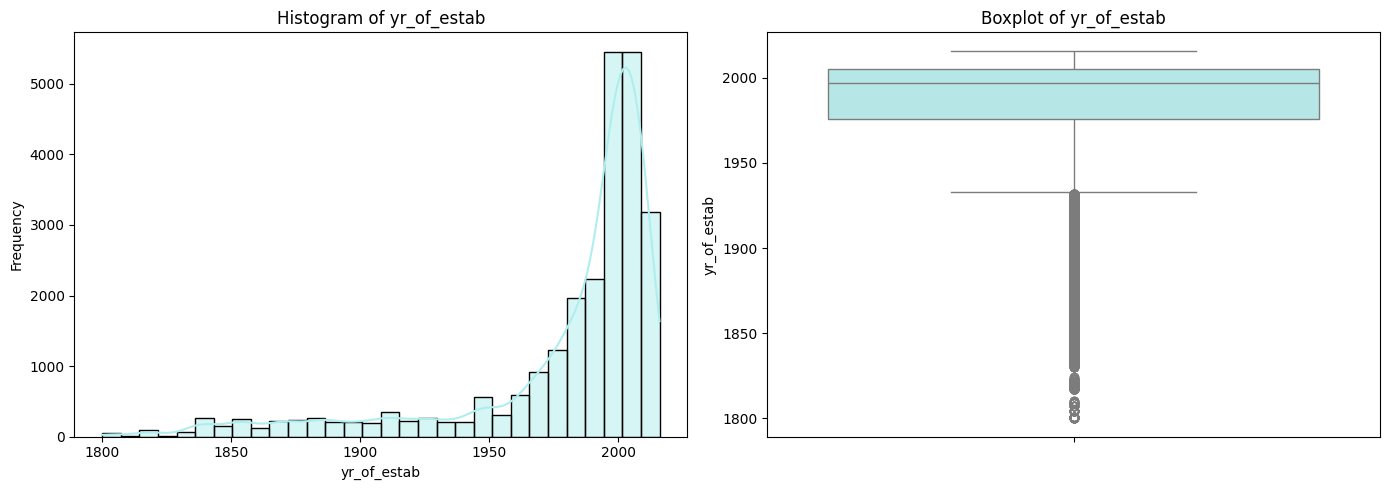

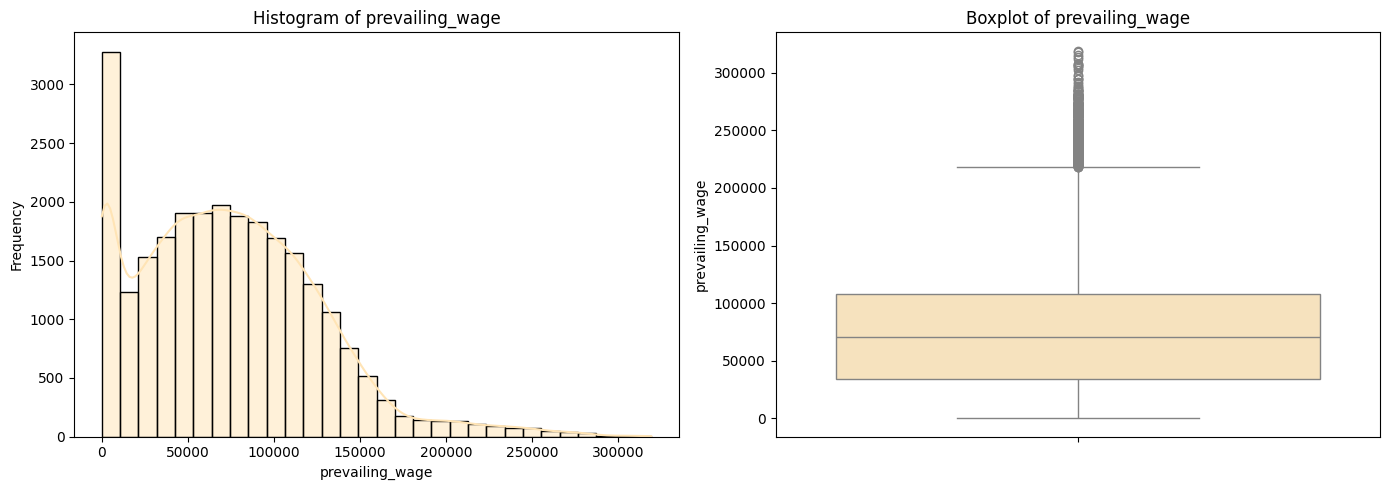

In [16]:
colors = ['lightpink', 'paleturquoise', 'moccasin']

for i, feature in enumerate(numerical):
    # Create subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot the histogram
    sns.histplot(df[numerical[i]], bins=30, kde=True, color=colors[i], ax=ax1)
    ax1.set_title(f'Histogram of {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Frequency')
    
    # Plot the boxplot
    sns.boxplot(y=df[feature], color=colors[i], ax=ax2)
    ax2.set_title(f'Boxplot of {feature}')
    ax2.set_xlabel('')
    ax2.set_ylabel(feature)
    
    # Adjust layout
    plt.tight_layout()
    # Save plot
    fig.savefig(f'./images/{feature}.png')
    fig.show()

**Observations:**
- `no_of_employees`: Exhibits a long-tailed, right-skewed distribution, indicating the presence of a few very large employers.
- `yr_of_estab`: As a discrete feature (recorded in distinct, yearly intervals), it shows a left-skewed distribution, suggesting a concentration of younger establishments.
- `prevailing_wage`: Displays a near-symmetric distribution with a slight right-skew, suggesting the presence of a few high-paying positions.

**Recommendations:**
- Consider applying data transformations (e.g., logarithmic transformation, power transformation) or standardization (Z-score normalization) to improve model performance and address potential skewness.
    - `no_of_employees`: Apply a logarithmic transformation to address the right-skewed distribution. This can help improve model performance and make the data more interpretable.
    - `yr_of_estab`: Consider standardizing this feature using Z-score normalization to bring it to a common scale with other variables and potentially improve model performance.
    - `prevailing_wage`: While near-symmetric, consider standardizing this feature using Z-score normalization to improve model performance and ensure comparability with other features.

In [17]:
# List the categories in each categorical feature
for feature in df[categorical]:
    unique_values = df[feature].unique()
    print(f"{feature}: {unique_values}")
    print()

case_id: ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']

continent: ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']

education_of_employee: ['High School' "Master's" "Bachelor's" 'Doctorate']

has_job_experience: ['N' 'Y']

requires_job_training: ['N' 'Y']

region_of_employment: ['West' 'Northeast' 'South' 'Midwest' 'Island']

unit_of_wage: ['Hour' 'Year' 'Week' 'Month']

full_time_position: ['Y' 'N']

case_status: ['Denied' 'Certified']



In [18]:
# Calculate the percentage of observations falling within each category of the categorical variables
for col in categorical:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

**Observations:**

`case_id`:
- Unique identifiers for each application.
- Each `case_id` appears with an equal frequency, representing a unique application.
- Can be dropped as it does not provide any relevant information for model training.

`continent`:
- Significant geographic bias with a majority of applicants from Asia (66.17%).
- Europe is the second most frequent continent of origin (14.65%).
- Other continents (North America, South America, Africa, Oceania) have considerably lower proportions.
- Consider merging less frequent continents (e.g., South America, Africa, Oceania) into a single category (e.g., "Other") to address potential class imbalance and improve model robustness.

`education_of_employee`:
- Applicants with Bachelor's and Master's degrees are well-represented (40.16% and 37.81%, respectively).
- High School and Doctorate degrees have lower representation.

`has_job_experience`:
- A majority of applicants (58.09%) possess prior work experience.

`requires_job_training`:
- A significant majority of applicants (88.40%) do not require job training.

`region_of_employment`:
- Northeast, South, and West regions have similar application proportions.
- Midwest and Island regions have lower application proportions.

`unit_of_wage`:
- "Year" is the predominant unit of wage, accounting for 90.12% of observations.
- Other units (Hour, Week, Month) have significantly lower proportions.

`full_time_position`:
- A significant majority of positions are full-time (89.38%).

`case_status`:
- Class imbalance exists, with approximately two-thirds of applications (66.79%) being "Certified" and one-third (33.21%) being "Denied."

**Key Insights:**

- **Geographic Bias:** The significant overrepresentation of applicants from Asia suggests potential geographic bias in the dataset.
- **Dominant Applicant Profile:** The typical applicant profile appears to be a university graduate with prior work experience, seeking a full-time position in the Northeast, South, or West regions.
- **Data Preprocessing Considerations:**
  - Drop `case_id` as it is not informative.
  - Consider merging less frequent categories in `continent` to address class imbalance.
  - Address the potential impact of class imbalance in `case_status` during model development.
  - Standardize `prevailing_wage` by converting all values to a common unit (e.g., annual).

In [19]:
# Drop the 'case_id' variable
categorical.remove('case_id')

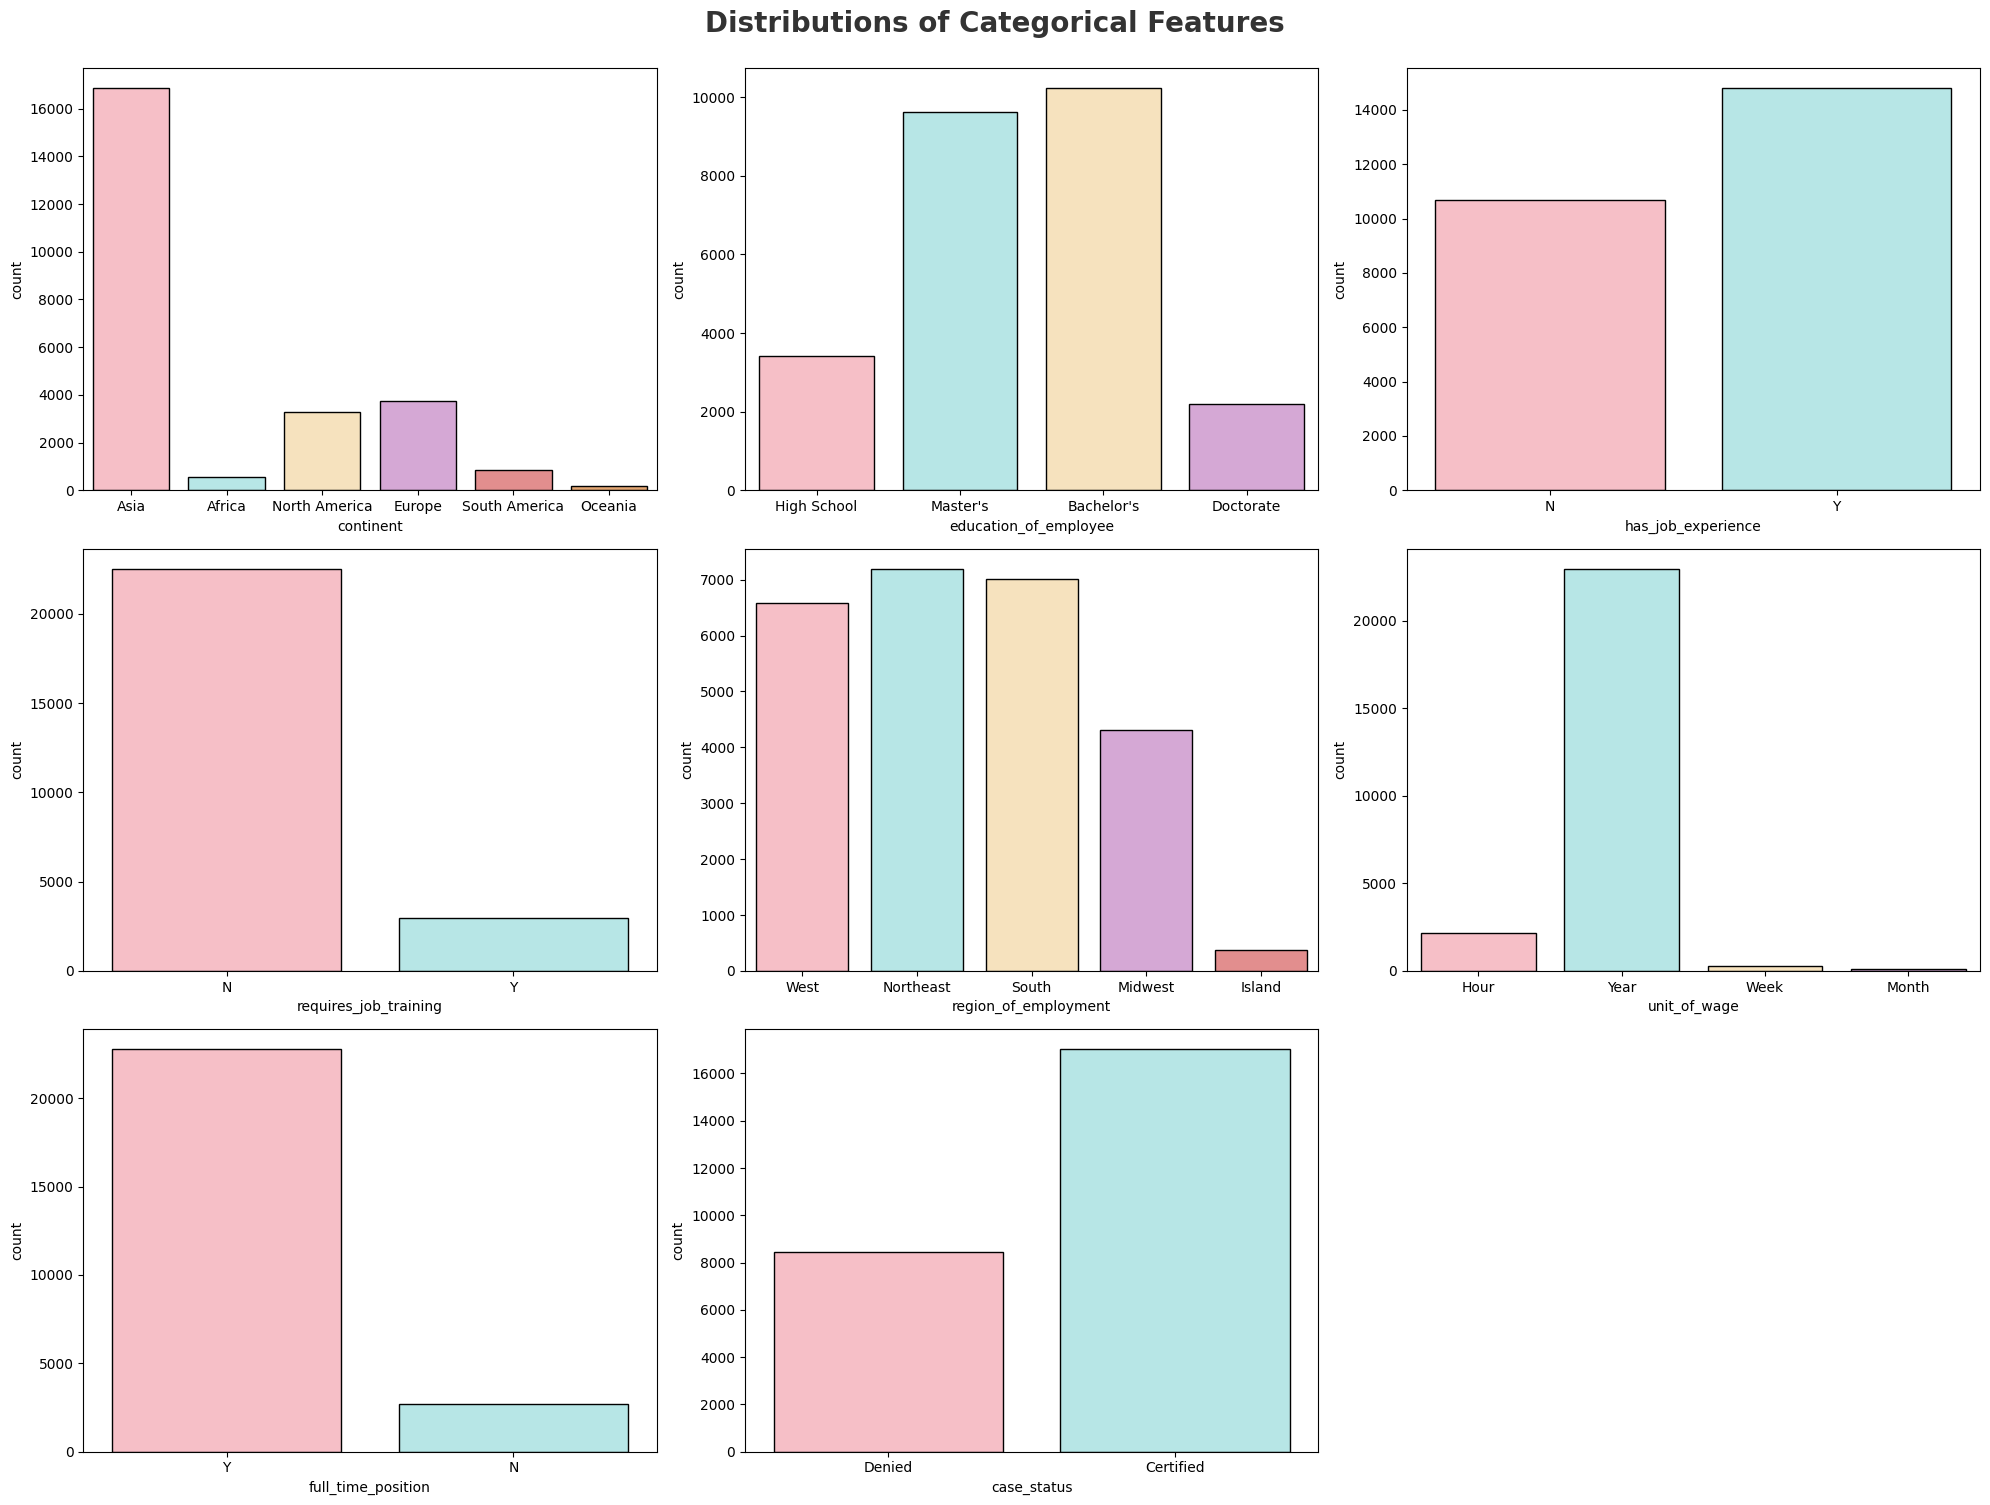

In [20]:
# Plot a bar graph for each categorical feature
plt.figure(figsize=(20, 15))
plt.suptitle('Distributions of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Create a custom color palette
colors = ['lightpink', 'paleturquoise', 'moccasin', 'plum', 'lightcoral', 'sandybrown']

for i in range(0, len(categorical)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical[i]], ec='black', palette=sns.color_palette(colors, len(colors)))
    plt.xlabel(categorical[i])
    plt.tight_layout()

# Save plot
plt.savefig('./images/univariate_analysis_cat.png')
plt.show()

**Observations:**
- **Dominant Categories:** The variables `requires_job_training`, `unit_of_wage`, `full_time_position`, and `continent` exhibit a single dominant category, indicating a potential class imbalance.
- **Balanced Categories:** The remaining categorical variables show a more balanced distribution across their categories.

### A closer look at the target variable (`case_status`)

In [21]:
# Show the number of Certified and Denied samples in the DataFrame
df.case_status.value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

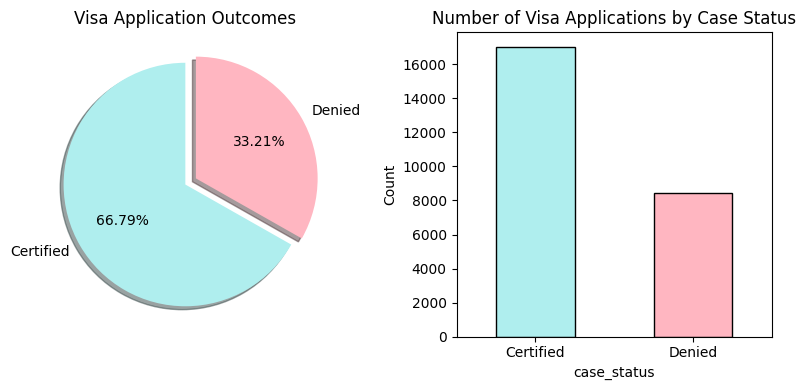

In [22]:
target = 'case_status'
percentage = df[target].value_counts(normalize=True) * 100
labels = ['Certified', 'Denied']

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot the pie chart
explode = (0, 0.1)
colors = ['paleturquoise', 'lightpink']
ax1.pie(percentage, labels=labels, startangle=90, autopct='%1.2f%%',
        explode=explode, shadow=True, colors=colors)
ax1.set_title('Visa Application Outcomes')

# Plot the bar graph
df[target].value_counts().plot(kind='bar', ec='black', color=colors, ax=ax2)
ax2.set_ylabel('Count')
ax2.set_title('Number of Visa Applications by Case Status')
plt.xticks(rotation=0)

# Adjust layout
plt.tight_layout()
# Save plot
plt.savefig(f'./images/{target}.png', dpi=300, bbox_inches='tight')
plt.show()

**Observation:** The presence of class imbalance in `case_status`, where "Certified" applications are overrepresented, can lead to biased models that perform poorly on the "Denied" class.

### Differentiate between discrete and continuous numerical features

In [23]:
discrete_features = [feature for feature in numerical if len(df[feature].unique()) <= 25]
continuous_features = [feature for feature in numerical if len(df[feature].unique()) > 25]

# Manually update 'yr_of_estab' as a discrete feature instead of continuous
discrete_features.append('yr_of_estab')
continuous_features.remove('yr_of_estab')

print(f'{len(discrete_features)} discrete feature(s): {discrete_features}')
print(f'{len(continuous_features)} continuous feature(s): {continuous_features}')

1 discrete feature(s): ['yr_of_estab']
2 continuous feature(s): ['no_of_employees', 'prevailing_wage']




**Discrete:**
  - Can only take on specific, distinct values.
  - Often represented by whole numbers or integers.
    
**Continuous:**
  - Can take on any value within a given range.
  - Can include decimals or fractions.
    
**Considering `yr_of_estab`:**
  - `yr_of_estab` represents the year an establishment was founded.
  - Years are typically represented as whole numbers (e.g., 1970, 2000, 2025).
  - While there's technically a continuous timeline, the way we record establishment years is in distinct, yearly intervals.
    
**Conclusion:**
  - `yr_of_estab` is best classified as a discrete numerical feature.

### Check for Multicollinearity among numerical features

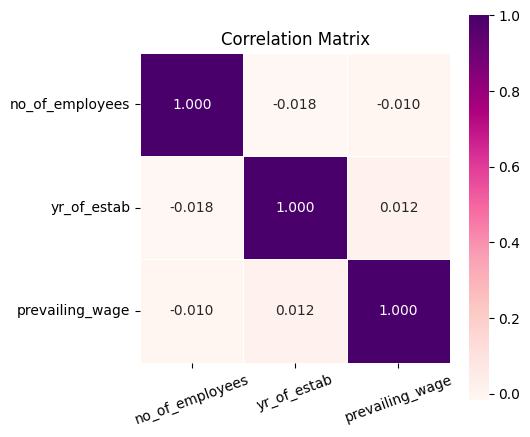

In [24]:
# Compute and plot the correlation coefficient between every pair of features
correlation_matrix = df[numerical].corr()
plt.figure(figsize=(5, 5))

# Plot the heatmap for correlation matrix
cm = sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt='.3f', linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.xticks(rotation=20)
plt.yticks(rotation=0)

# Save plot
plt.savefig('./images/correlation_matrix.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

**Insights:**
- **Low Correlation:** The correlation coefficients between the variables are generally low (between -0.018 and 0.012), suggesting a weak or non-existent linear relationship between them.
- **Minimal Multicollinearity:** The low correlation coefficients indicate minimal multicollinearity among the predictor variables.

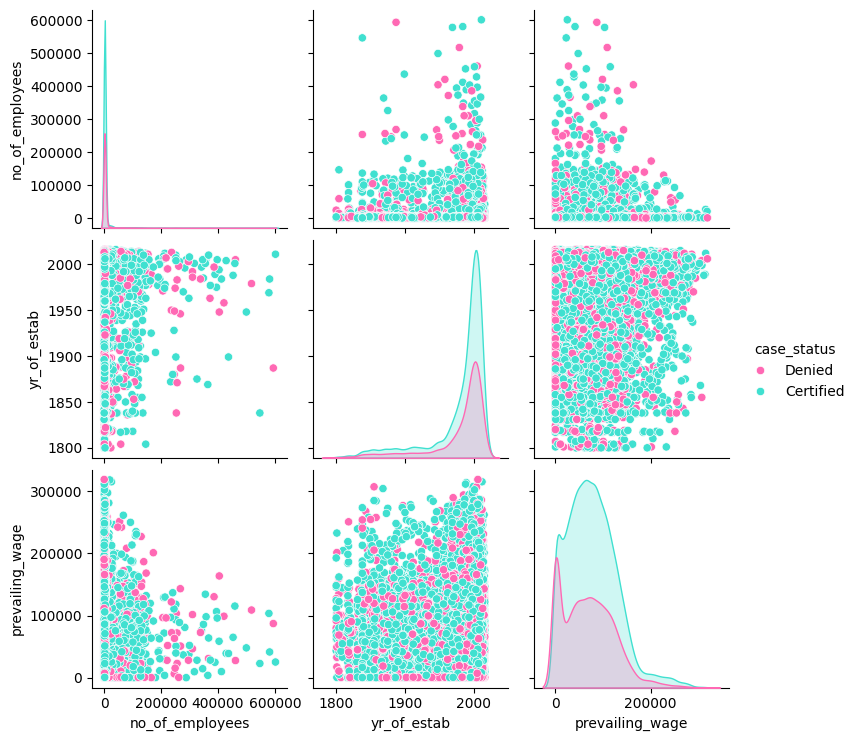

In [44]:
sns.pairplot(df, hue='case_status', palette=['hotpink', 'turquoise'])
plt.show()

### Identify relationships between categorical predictors and the target variable (`case_status`)

The **Chi-Squared ($\chi^2$) Test of Independence** is a statistical method used to determine if there's a statistically significant association between two categorical variables.

$$\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}$$

In the context of our analysis, we express the null and alternative hypotheses as follows:
* $H_0$ **(Null Hypothesis):** The categorical feature is independent of `case_status`(no association).

* $H_1$ **(Alternative Hypothesis):** The categorical feature is not independent of `case_status` (there is an association).

In [26]:
# Import chi-square test of independence
from scipy.stats import chi2_contingency

In [27]:
# Perform Hypothesis Testing
chi2_test = []

for feature in categorical:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
        
result = pd.DataFrame(data=[categorical, chi2_test]).T
result.columns = ['Feature', 'Outcome']
result

,Feature,Outcome
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


**Insights:**
- The Chi-Squared Test of Independence revealed no significant association between `requires_job_training` and `case_status`, suggesting the categorical feature may not be a strong predictor and could be dropped from the model.

### Impact of continent on visa application outcomes

In [28]:
# Group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame().round(4) * 100

proportion
continent     case_status            
Africa        Certified         72.05
              Denied            27.95
Asia          Certified         65.31
              Denied            34.69
Europe        Certified         79.23
              Denied            20.77
North America Certified         61.88
              Denied            38.12
Oceania       Certified         63.54
              Denied            36.46
South America Certified         57.86
              Denied            42.14

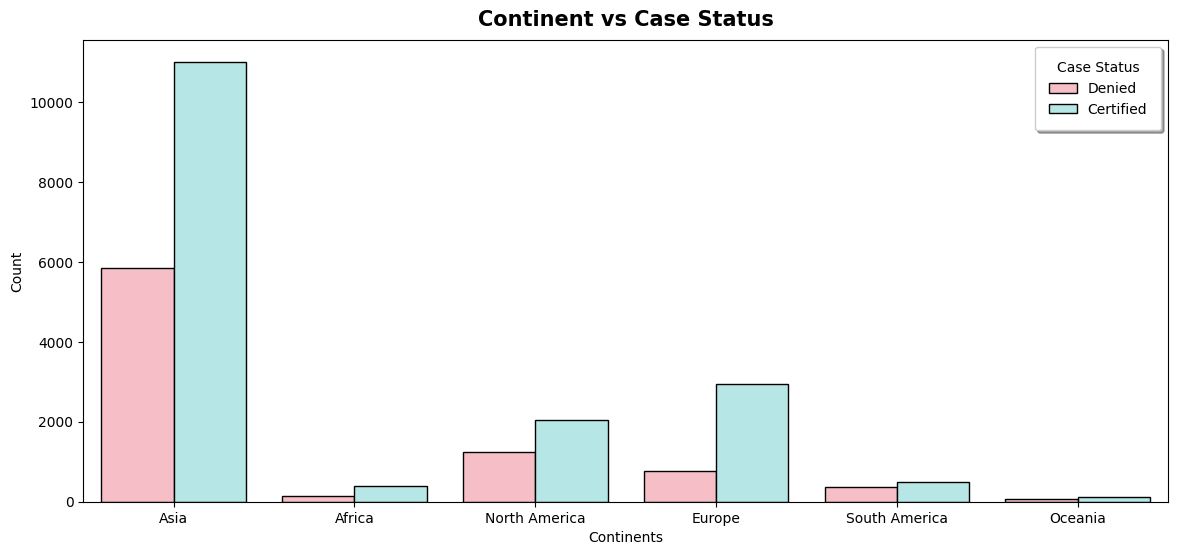

In [29]:
plt.subplots(figsize=(14, 6))

colors = ['lightpink', 'paleturquoise']

# Plot the count plot
sns.countplot(x='continent', hue='case_status', data=df, ec='black', palette=sns.color_palette(colors, len(colors)))
plt.title('Continent vs. Case Status', fontsize=15, fontweight='bold', pad=10)
plt.ylabel('Count')
plt.xlabel('Continents')
plt.legend(title='Case Status', shadow=True, borderpad=1)

# Save plot
plt.savefig('./images/continent-vs-case_status.png', dpi=300)
plt.show()

### Impact of prior work experience on visa application outcomes

In [30]:
# Group data by has_job_experience and their count of case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame().round(4) * 100

proportion
has_job_experience case_status            
N                  Certified         56.13
                   Denied            43.87
Y                  Certified         74.48
                   Denied            25.52

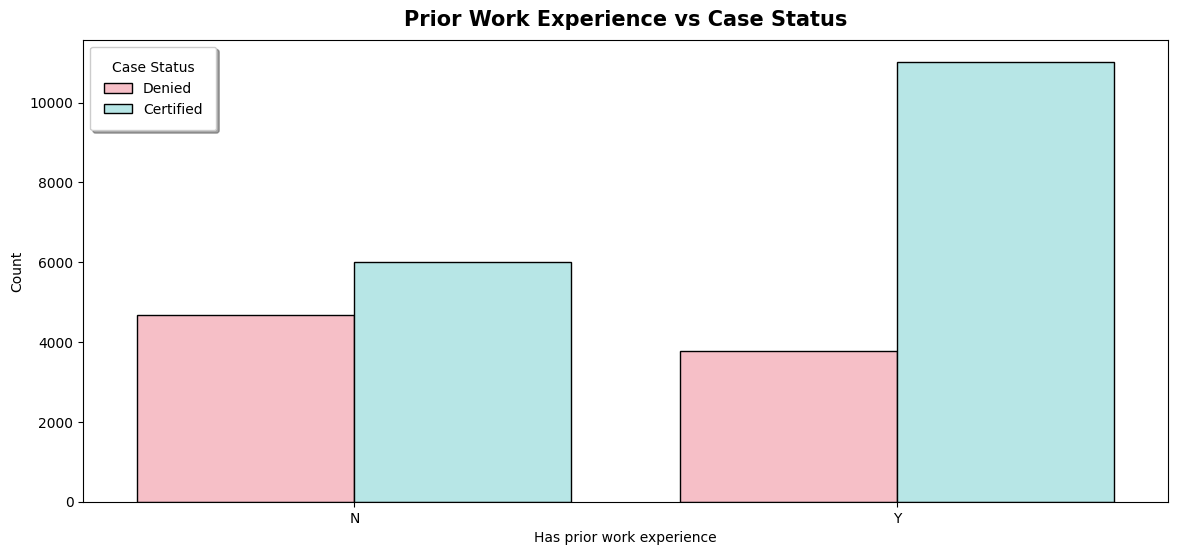

In [31]:
plt.subplots(figsize=(14, 6))

colors = ['lightpink', 'paleturquoise']

# Plot the count plot
sns.countplot(x='has_job_experience', hue='case_status', data=df, ec='black', palette=sns.color_palette(colors, len(colors)))
plt.title('Prior Work Experience vs. Case Status', fontsize=15, fontweight='bold', pad=10)
plt.ylabel('Count')
plt.xlabel('Has prior work experience')
plt.legend(title='Case Status', shadow=True, borderpad=1)

# Save plot
plt.savefig('./images/has_job_experience-vs-case_status.png', dpi=300)
plt.show()

### Check for outliers or data inconsistencies

In [32]:
# Filter the DataFrame for rows where prevailing_wage is less than the federal minimum wage
below_min_wage_count = df[df['prevailing_wage'] < 7.25]['case_id'].count() 

# Print the count of applicants with prevailing wages below the minimum wage
print(f"Number of applicants with prevailing wages below the federal minimum wage in the US: {below_min_wage_count}") 

Number of applicants with prevailing wages below the federal minimum wage in the US: 11


In [33]:
# Retrieve the records where prevailing_wage is less than the federal minimum wage
df[df['prevailing_wage'] < 7.25][['case_status', 'prevailing_wage', 'unit_of_wage', 'has_job_experience', 'full_time_position', 'education_of_employee']]

,case_status,prevailing_wage,unit_of_wage,has_job_experience,full_time_position,education_of_employee
634,Denied,3.3188,Hour,N,Y,Master's
5455,Certified,3.4889,Hour,Y,Y,Doctorate
8914,Denied,5.6396,Hour,N,Y,Bachelor's
13544,Denied,5.0899,Hour,Y,Y,High School
17033,Certified,7.0647,Hour,Y,Y,Master's
17448,Denied,3.0031,Hour,Y,Y,Master's
19425,Denied,5.1868,Hour,Y,Y,Bachelor's
19593,Certified,5.4108,Hour,N,Y,Master's
20482,Denied,6.3305,Hour,N,Y,Bachelor's
20575,Certified,2.1367,Hour,N,Y,Master's


**Observations:**
- 11 visa applications have prevailing wages below the United States federal minimum wage of $7.25 per hour.
- 4 of these 11 applications were certified for a work visa.

**Data Quality Concerns:**
- Prevailing wages below the minimum wage likely indicate data entry errors or inconsistencies.
- Including these records may introduce bias and negatively impact model accuracy.

**Recommendations:**
- Consider removing records with prevailing wages below the minimum wage from the dataset before model training to improve data quality and model reliability.